In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
mpl.rcParams.update({'font.size' : 14})
plt.rc('font', family = 'Malgun Gothic')
%matplotlib inline

In [6]:
df = pd.read_csv('data/suggestion.csv')
df.shape

(236, 8)

In [7]:
df.head()

,sgld,title,category,content,start,end,vote,author
0,280,행정기관 소속 위원회 위원 개인정보 및 안건 공개 기준에 관한 법적 근거 마련,일반행정,"ㅁ 현황ㅇ 법령에 따라 설치되는 행정기관 소속 위원회들이 다수 운영되고 있으며, ...",2019.10.16,2020.01.13,0,법제혁신
1,279,초과근무 줄이기!,일반행정,1. 문제점* 초과근무를 많이 할수록 일을 열심히 하고 있다고 생각하는 조직 문화*...,2019.10.16,2020.01.13,2,ㅁㄴㅁ
2,278,원스톱 의원요구자료 제출 시스템 구축,일반행정,​​□ 제안제목○ 원스톱 의원요구자료 제출 시스템 구축□현황 및 문제점○ 각부처 별...,2019.10.15,2020.01.12,0,연시랑
3,277,예산을 공평하게 분배,사회통합,제목 : 예산을 부처별 공평하게 분배후 차후평가문제점 : 1. 예산편성 삭감원칙으...,2019.10.15,2020.01.12,3,슈퍼맨119
4,276,공무원 인트라넷 통합메신저,일반행정,"부처별,기관별로 자체 인트라넷 메신저가 활성화되며,신속한 업무 추진과 협조에 큰 도...",2019.10.15,2020.01.12,0,페이소스


In [8]:
df.tail(1)

,sgld,title,category,content,start,end,vote,author
235,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018.07.24,2018.08.23,14,헌비


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
sgld        236 non-null int64
title       236 non-null object
category    236 non-null object
content     234 non-null object
start       236 non-null object
end         236 non-null object
vote        236 non-null int64
author      233 non-null object
dtypes: int64(2), object(6)
memory usage: 14.9+ KB


In [10]:
df.describe(include = 'all')

,sgld,title,category,content,start,end,vote,author
count,236.000000,236,236,234,236,236,236.000000,233
unique,NaN,236,11,234,145,145,NaN,162
top,NaN,"소통,융합의 행정으로 보다 효율적인 4차산업혁명대응전략마련",일반행정,덥다 덥다 한들 이렇게까지 더운 여름은 정말이지 난생 처음이다! 마치 불가마처럼 내...,2019.08.28,2019.11.25,NaN,올리는 시민
freq,NaN,1,41,1,13,13,NaN,18
mean,145.161017,NaN,NaN,NaN,NaN,NaN,33.902542,NaN
std,83.195486,NaN,NaN,NaN,NaN,NaN,190.674266,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,66.750000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,153.500000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
75%,216.250000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN


In [11]:
df['category'].value_counts()

일반행정     41
안전       33
보건복지     32
기타       31
인권/평등    21
국민참여     17
상생협력     15
환경       14
사회통합     13
공동체      10
반부패청렴     9
Name: category, dtype: int64

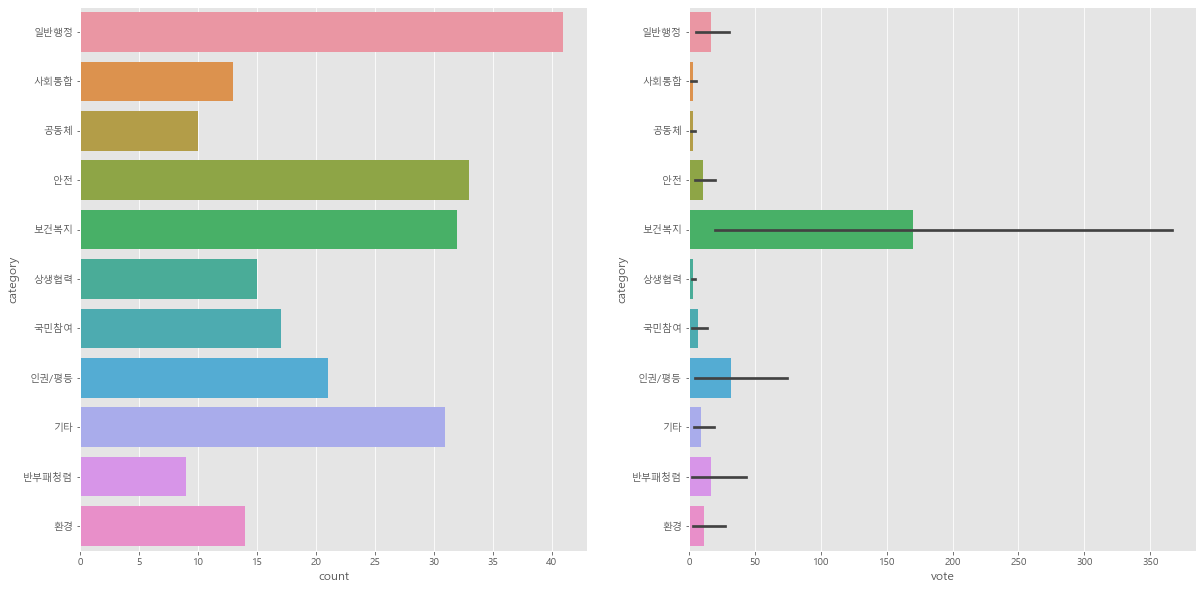

In [12]:
figure,(ax1, ax2) = plt.subplots(1,2)
figure.set_size_inches(20, 10)
sns.countplot(data = df, y = 'category', ax = ax1)
sns.barplot(data = df, x = 'vote', y = 'category', ax = ax2)

In [13]:
df.groupby(['category'])['vote'].sum().reset_index().sort_values('vote', ascending = False)

,category,vote
4,보건복지,5447
9,일반행정,683
8,인권/평등,672
7,안전,354
2,기타,292
10,환경,159
3,반부패청렴,153
1,국민참여,118
6,상생협력,51
5,사회통합,41


In [14]:
df_category_vote = pd.DataFrame(df.groupby(['category'])['vote'].sum()).reset_index().sort_values('vote', ascending = False)
df_category_vote.head()

,category,vote
4,보건복지,5447
9,일반행정,683
8,인권/평등,672
7,안전,354
2,기타,292


In [15]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df[['start', 'end']].head()

,start,end
0,2019-10-16,2020-01-13
1,2019-10-16,2020-01-13
2,2019-10-15,2020-01-12
3,2019-10-15,2020-01-12
4,2019-10-15,2020-01-12


In [16]:
df.dtypes

sgld                 int64
title               object
category            object
content             object
start       datetime64[ns]
end         datetime64[ns]
vote                 int64
author              object
dtype: object

In [17]:
df['start-date'] = df['start'].dt.date
df['start-month'] = df['start'].dt.year.astype(str) + '-' + df['start'].dt.month.astype(str)
df['start-weekday'] = df['start'].dt.dayofweek

In [18]:
df[['start-date', 'start-month', 'start-weekday']].head()

,start-date,start-month,start-weekday
0,2019-10-16,2019-10,2
1,2019-10-16,2019-10,2
2,2019-10-15,2019-10,1
3,2019-10-15,2019-10,1
4,2019-10-15,2019-10,1


In [19]:
weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
df['weekday'] = df['start-weekday'].apply(lambda x : weekday_map[x])
df[['start-month', 'start-weekday', 'weekday']].head()

,start-month,start-weekday,weekday
0,2019-10,2,수
1,2019-10,2,수
2,2019-10,1,화
3,2019-10,1,화
4,2019-10,1,화


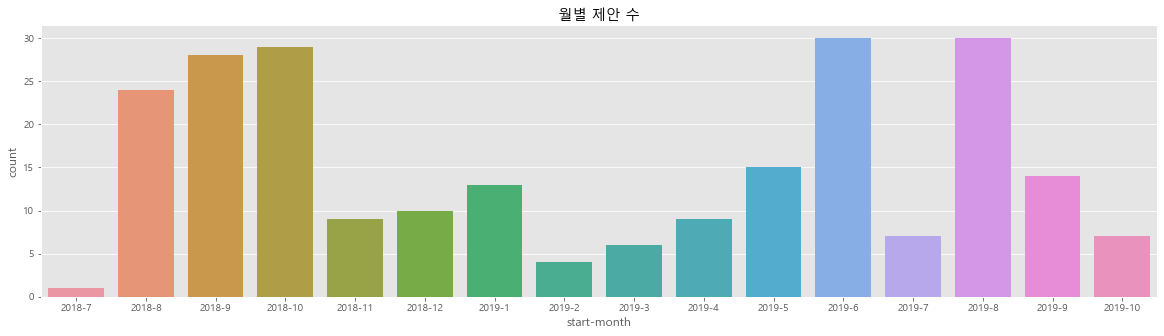

In [20]:
plt.figure(figsize = (20,5))
plt.title('월별 제안 수')
sns.countplot(data = df.sort_values(by = 'start-date', ascending = True), x = 'start-month')

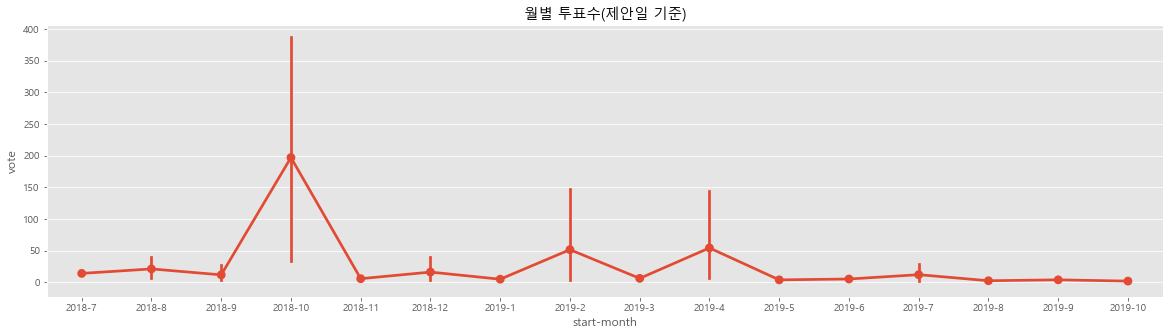

In [21]:
plt.figure(figsize = (20,5))
plt.title('월별 투표수(제안일 기준)')
sns.pointplot(data = df.sort_values(by = 'start-date', ascending = True), x = 'start-month', y = 'vote')

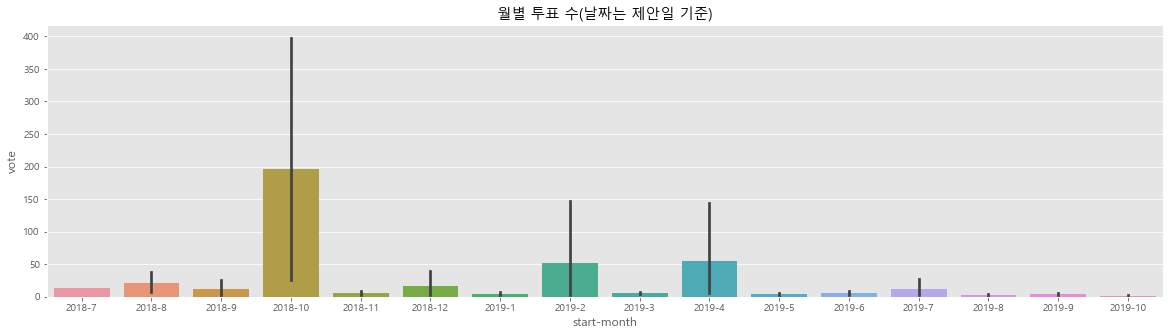

In [22]:
plt.figure(figsize = (20,5))
plt.title('월별 투표 수(날짜는 제안일 기준)')
sns.barplot(data = df.sort_values(by = 'start-date', ascending = True), x = 'start-month', y = 'vote')

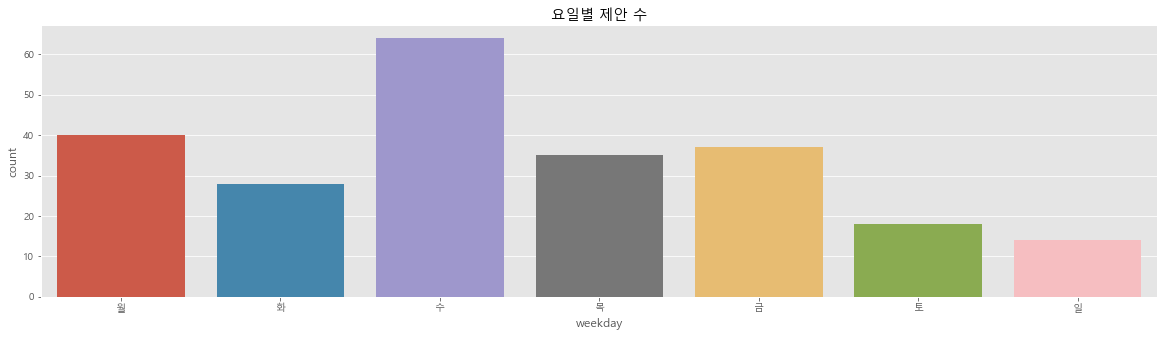

In [23]:
plt.figure(figsize = (20,5))
plt.title('요일별 제안 수')
sns.countplot(data = df.sort_values(by = 'start-weekday'), x = 'weekday')

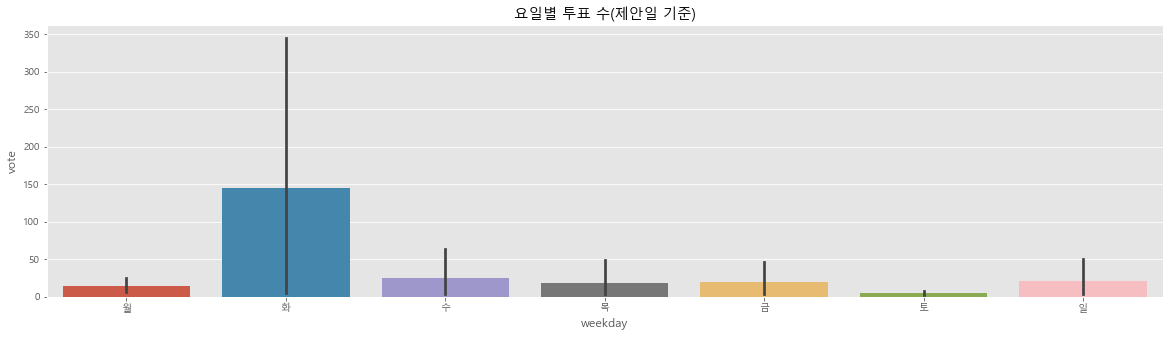

In [24]:
plt.figure(figsize = (20,5))
plt.title('요일별 투표 수(제안일 기준)')
sns.barplot(data = df.sort_values(by = 'start-weekday'), x = 'weekday', y = 'vote')

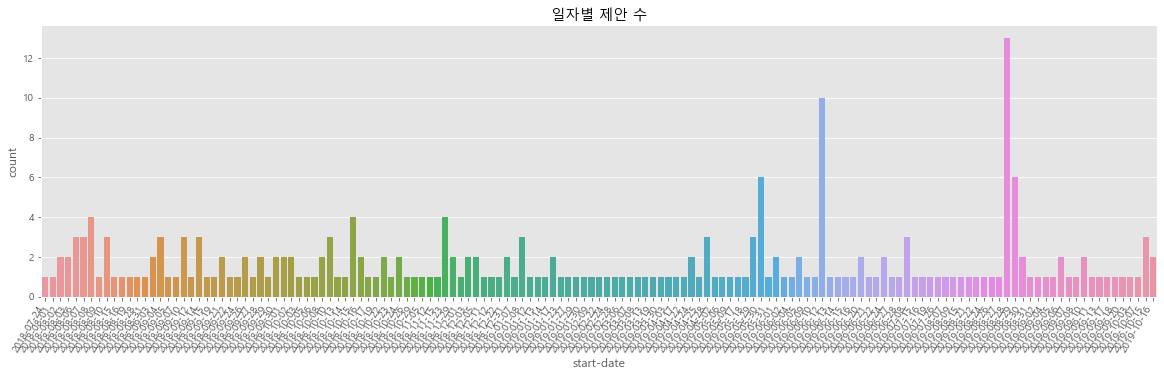

In [25]:
plt.figure(figsize = (20,5))
plt.title('일자별 제안 수')
plt.xticks(rotation = 60, ha = 'right')
sns.countplot(data = df.sort_values(by = 'start-date'), x = 'start-date')

In [26]:
df_10_10 = df[df['start']>'2019-10-10']
df_10_10['start-date'].value_counts()

2019-10-15    3
2019-10-16    2
Name: start-date, dtype: int64

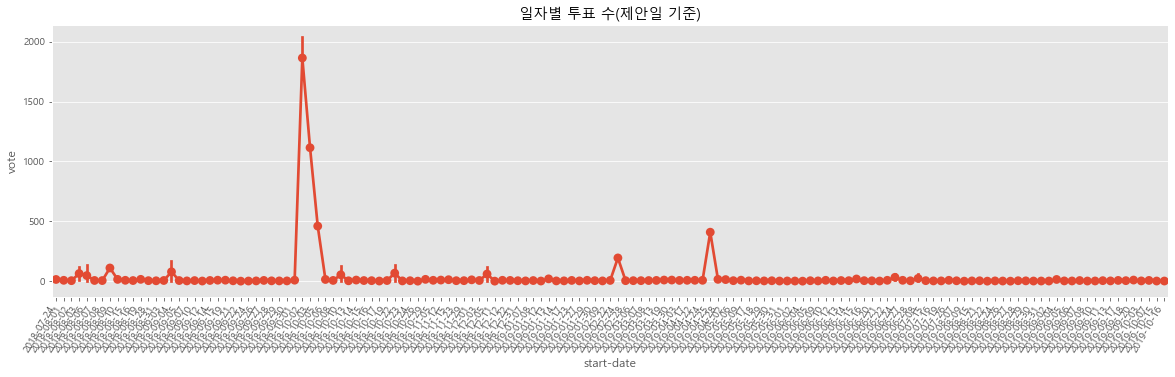

In [27]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 60, ha = 'right')
plt.title('일자별 투표 수(제안일 기준)')
sns.pointplot(data = df.sort_values(by = 'start-date'), x = 'start-date', y = 'vote')

In [28]:
df.head()

,sgld,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday
0,280,행정기관 소속 위원회 위원 개인정보 및 안건 공개 기준에 관한 법적 근거 마련,일반행정,"ㅁ 현황ㅇ 법령에 따라 설치되는 행정기관 소속 위원회들이 다수 운영되고 있으며, ...",2019-10-16,2020-01-13,0,법제혁신,2019-10-16,2019-10,2,수
1,279,초과근무 줄이기!,일반행정,1. 문제점* 초과근무를 많이 할수록 일을 열심히 하고 있다고 생각하는 조직 문화*...,2019-10-16,2020-01-13,2,ㅁㄴㅁ,2019-10-16,2019-10,2,수
2,278,원스톱 의원요구자료 제출 시스템 구축,일반행정,​​□ 제안제목○ 원스톱 의원요구자료 제출 시스템 구축□현황 및 문제점○ 각부처 별...,2019-10-15,2020-01-12,0,연시랑,2019-10-15,2019-10,1,화
3,277,예산을 공평하게 분배,사회통합,제목 : 예산을 부처별 공평하게 분배후 차후평가문제점 : 1. 예산편성 삭감원칙으...,2019-10-15,2020-01-12,3,슈퍼맨119,2019-10-15,2019-10,1,화
4,276,공무원 인트라넷 통합메신저,일반행정,"부처별,기관별로 자체 인트라넷 메신저가 활성화되며,신속한 업무 추진과 협조에 큰 도...",2019-10-15,2020-01-12,0,페이소스,2019-10-15,2019-10,1,화


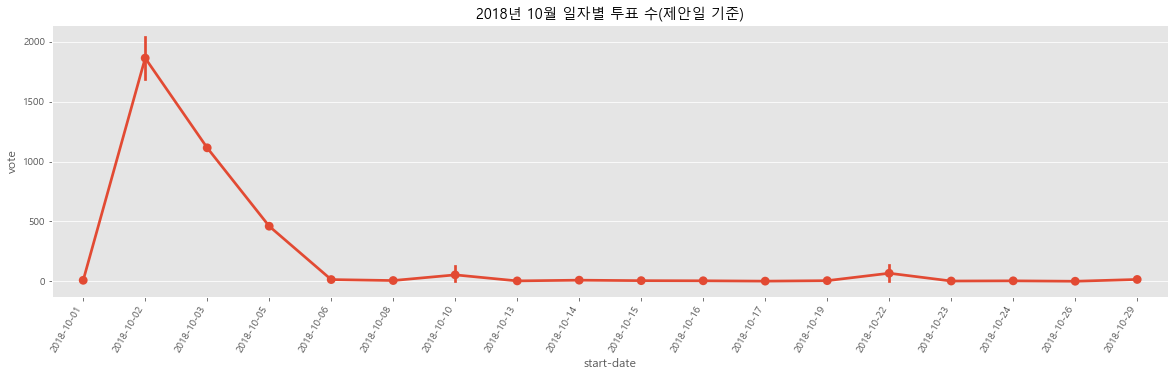

In [29]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 60, ha = 'right')
plt.title('2018년 10월 일자별 투표 수(제안일 기준)')
df_2018_10 = df[(df['start']>='2018-10-01')&(df['start']<'2018-11-01')]
sns.pointplot(data = df_2018_10.sort_values(by = 'start-date'), x = 'start-date', y = 'vote')

In [30]:
df.loc[df['vote']>2000, ["sgId", "start", "title", "category", "content"]]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,sgId,start,title,category,content
179,NaN,2018-10-02,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...


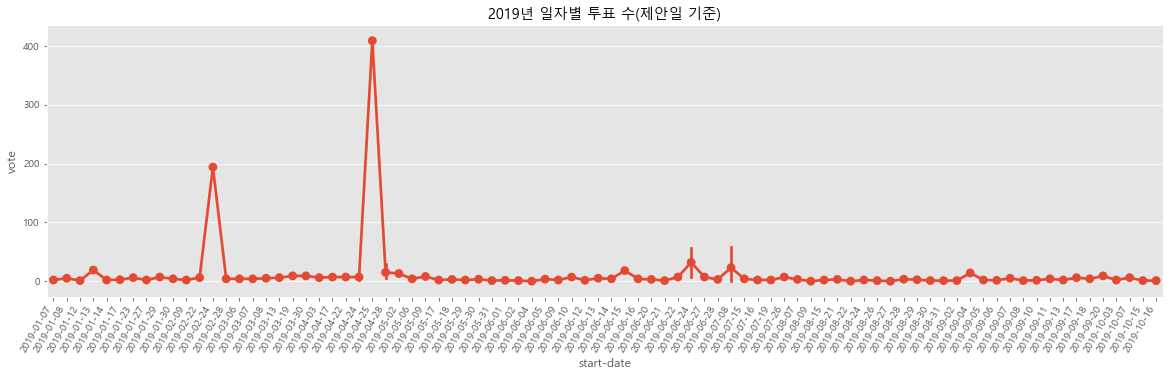

In [31]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 60, ha = 'right')
plt.title('2019년 일자별 투표 수(제안일 기준)')
df_2019 = df[df['start']>'2018-12-31']
sns.pointplot(data = df_2019.sort_values(by = 'start-date'), x = 'start-date', y = 'vote')

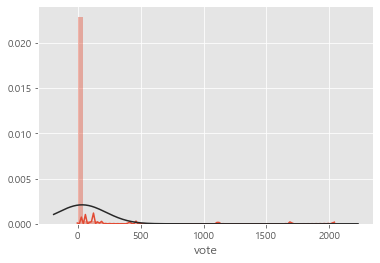

In [32]:
from scipy.stats import norm
sns.distplot(df['vote'], fit = norm)

In [33]:
df[df['end']<'2019-10-16'].shape

(183, 12)

In [34]:
df['close'] = df['end']<'2019-10-16'

In [35]:
df['close'].value_counts()

True     183
False     53
Name: close, dtype: int64

In [36]:
preview_columns = ['sgld', 'title', 'category', 'content', 'vote', 'start']
df_top_vote = df.sort_values(by = 'vote', ascending = False).head(10)
df_top_vote[preview_columns]

,sgld,title,category,content,vote,start
179,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037,2018-10-02
180,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693,2018-10-02
178,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115,2018-10-03
177,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460,2018-10-05
106,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409,2019-04-25
119,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194,2019-02-24
207,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167,2018-09-04
160,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133,2018-10-22
227,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,132,2018-08-06
172,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126,2018-10-10


In [37]:
df_vote_100 = df.loc[df['vote']>100, preview_columns]
print('100개 이상 투표를 받은 제안 : ', len(df_vote_100))
df_vote_100

100개 이상 투표를 받은 제안 :  13


,sgld,title,category,content,vote,start
106,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409,2019-04-25
119,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194,2019-02-24
140,131,공직자 임용 및 선출직 입후보 배제 원칙 강화,반부패청렴,선출직이든 정무직이든 일반직이든 입법 행정 사법 3부 및 전국 지자체의모든 공무원은...,119,2018-12-05
160,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133,2018-10-22
172,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126,2018-10-10
177,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460,2018-10-05
178,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115,2018-10-03
179,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037,2018-10-02
180,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693,2018-10-02
207,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167,2018-09-04


In [38]:
df[df['category'] == '일반행정'].sort_values(by = 'vote', ascending = False).head()

,sgld,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
119,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,194,무한소,2019-02-24,2019-2,6,일,True
207,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018-09-04,2018-12-02,167,NaN,2018-09-04,2018-9,1,화,True
172,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018-10-10,2019-01-07,126,안전역량,2018-10-10,2018-10,2,수,True
171,72,정부부처 공모사업을 한눈에 보고싶습니다.,일반행정,저는 지자체에서 혁신업무 및 기획업무를 담당하고있습니다.작은 지방이라 공모사업 선정...,2018-10-10,2019-01-07,33,혁신선두,2018-10-10,2018-10,2,수,True
38,240,청와대공무직공개채용,일반행정,현재 각 공공기관이나 중앙부처등등 공공시설에서근무하는 청사미화원.조경.방호 등등.....,2019-08-28,2019-11-25,17,인생2모작,2019-08-28,2019-8,2,수,False
